# Сборный проект

# Содержание
 1. Изучение данных из файла
 2. Предобработка данных
 3. Исследовательский анализ данных
 4. Составьте портрет пользователя каждого региона
 5. Проверим гипотезы
 6. Общий вывод

## Изучение данных из файла
 

In [42]:
# Подключим все библиотеки, что б к ним не возращаться
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [43]:
# Прочтем файл с данными
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [44]:
# Посмотрим информацию методом Info
data.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [45]:
# посмотрим на значение по категорийным признакам
display(data.describe())
for col in data.columns:
    if data[col].dtype == "object":
    
        print(col)
        print(data[col].unique())
        print

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
User_Score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' 

в столбце User_Score видим абривиатуру tbd, просмотрим ее чуть позжу

In [46]:
# Посмотрим на столбцы в столбце
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [47]:
# Проверим наличие пустых значений
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [48]:
#Посмотрим на таблицу, где имеются пустые значения в столбце critic_score
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [49]:
#Посмотрим на таблицу, где имеются пустые значения в столбце user_score
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [50]:
#Посмотрим на таблицу, где имеются пустые значения в столбце rating
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [51]:
#Посмотрим на таблицу, где имеются пустые значения в столбце year_of_release
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [52]:
#Посмотрим какие платформы для игры у нас имеются
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [53]:
#Посмотрим какие жанры игр мы имеем и нет ли повторений
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Необходимо привести к правильному типу столбец : Year of Release
Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок
Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки


## Предобработка данных


In [54]:
# Заменим названия столбцов (приведем к нижнему регистру) 
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [55]:
# Приведем к нижнему регистру следующие столбцы:
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [56]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Обработаем пропуски при необходимости:

In [57]:
# Посчитаем количество пустых значений в столбце year_of_release
data['year_of_release'].isna().sum()

269

In [58]:
# Возьмем одну из 269 игр с неуказанным годом и проверим, выпускалась ли она на других платформах.
data.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
1881,madden nfl 2004,xb,2003,sports,1.02,0.02,0.00,0.05,92.0,8.3,e
3889,madden nfl 2004,gc,2003,sports,0.40,0.10,0.00,0.01,94.0,7.7,e
5708,madden nfl 2004,gba,2003,sports,0.22,0.08,0.00,0.01,70.0,6.6,e


In [59]:
# Можно попробовать восполнить пробелы в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных
# для разных платформ (в надежде, что у какой-то из версий игры будет запись о годе, как это оказалось с игрой "madden nfl 2004").
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [60]:
#Посмотрим сколько удалось заполнить пустых значений
data['year_of_release'].isna().sum()

146

Обратим внимание на аббревиатуру tbd в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать

Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. 
Поэтому предлагаю заменить tbd на Nan

In [61]:
#Заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [62]:
# Поменяем формат столбца user_score на float
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

In [63]:
data['user_score'].replace('tbd', np.nan, regex=True).astype(float)

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [64]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вывод по подготовке данных:

Необходимо привести к правильному типу столбец : Year of Release
Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок
Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки
Дубликатов не имеется

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

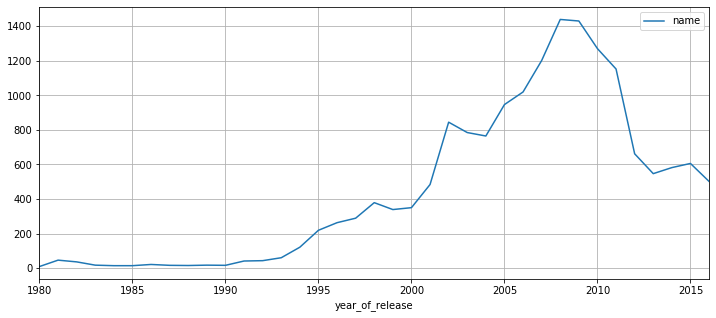

In [65]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
games_year = data.pivot_table(index='year_of_release', values='name',aggfunc='count').plot(grid=True, figsize=(12, 5))

по гистаграмме видно что после 1995 годов игры стали выпускатся чаше и больше до 2009 года, потом пошел спад 

По графику видно что платформы появляются в год по 1-2 шт, так же продолжительность если брать с 2005 года, к примеру
х360 - про существовала 11 лет, а ps3 - 10 лет. Платформы живут от 10- 13 лет

Text(0, 0.5, 'Количество продаж')

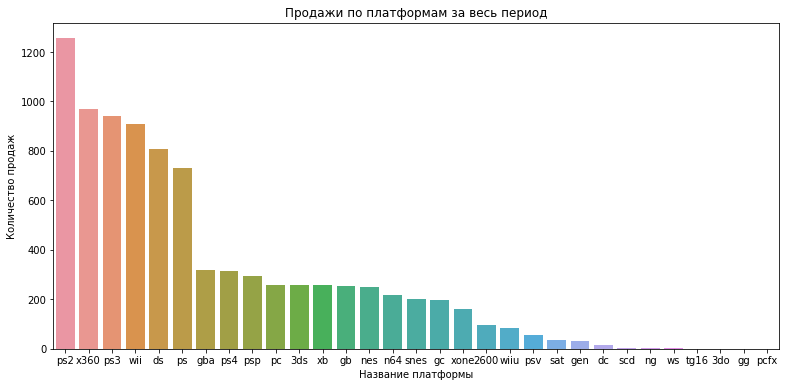

In [66]:
platform_on_sales = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

In [67]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года
def year_total_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [68]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top5_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top5_platforms = top5_platforms.reset_index().rename_axis(None, axis=1)
top5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


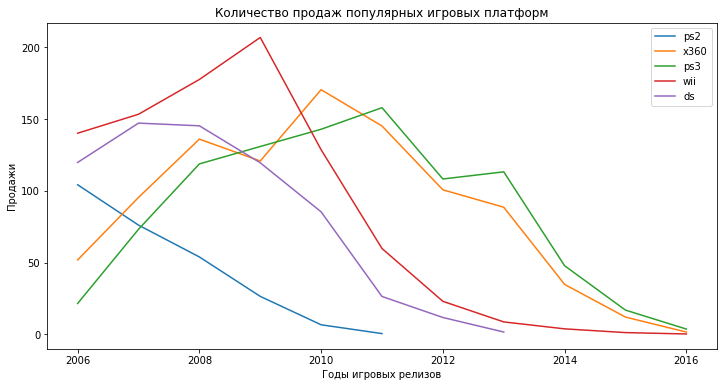

In [69]:
#Отрисуем все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top5_platforms['platform']):
    sns.lineplot(data=year_total_platform(i,data)['total_sales'], label=i)
    plt.legend()

Вывод:
Практически все игровые платформы в среднем существуют по 10 лет. 
Cамые продаваемые это ps3, ps2, x360
Самый пик наступает примерно через 5 лет после выхода приставки
у  WII был быстрый скачок в 2009 году и такой же резкий провал

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [70]:
#Сохраним в переменной data_top5_platforms топ 5 платформ и избавимся от выбросов
top5 = ['ps2','x360','ps3','wii','ds']
data_top5_platforms = data[data['platform'].isin(['ps2','x360','ps3','wii','ds'])]
data_top5_platforms = data_top5_platforms[data_top5_platforms['total_sales']<1.4]

In [71]:
data_top5_platforms['total_sales'].describe()

count    7469.000000
mean        0.280778
std         0.300902
min         0.000000
25%         0.060000
50%         0.160000
75%         0.400000
max         1.390000
Name: total_sales, dtype: float64

In [72]:
#Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
data_top5_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
ds,2055.0,0.189358,0.236453,0.01,0.04,0.10,0.23,1.38
ps2,1929.0,0.298891,0.301820,0.00,0.07,0.19,0.43,1.39
ps3,1180.0,0.358280,0.346588,0.00,0.09,0.23,0.56,1.39
wii,1211.0,0.278109,0.289531,0.01,0.08,0.17,0.39,1.39
x360,1094.0,0.339927,0.322823,0.01,0.10,0.22,0.49,1.38


Text(0, 0.5, 'Глобальные продажи')

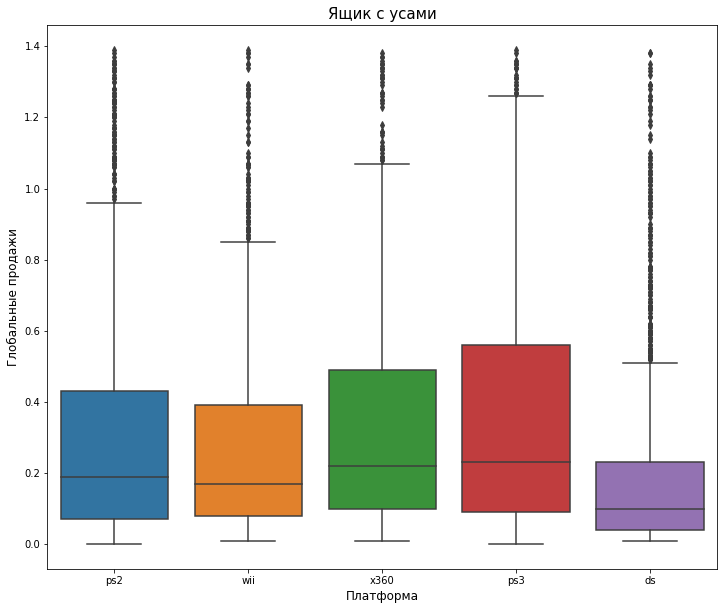

In [73]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=data_top5_platforms, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Вывод:
Провели срез данных для того, чтоыб отрисовать ящики с усами. 
Исходя из графиков видно, что медиана протекает у всех по разному
Больше всех продаж у PS3, затем X360, после PS2, WII и DS на последнем месте.

In [74]:
platforms_new = data_top5_platforms.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()
platforms_new

['wii', 'x360', 'ds', 'ps3', 'ps2']

In [98]:
platforms_new = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
platforms_new = top5_platforms.reset_index().rename_axis(None, axis=1)
platforms_new

,index,platform,total_sales
0,0,ps2,1255.77
1,1,x360,971.42
2,2,ps3,939.65
3,3,wii,907.51
4,4,ds,806.12


In [99]:
platforms_new['total_sales'].describe()

count       5.000000
mean      976.094000
std       168.198991
min       806.120000
25%       907.510000
50%       939.650000
75%       971.420000
max      1255.770000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

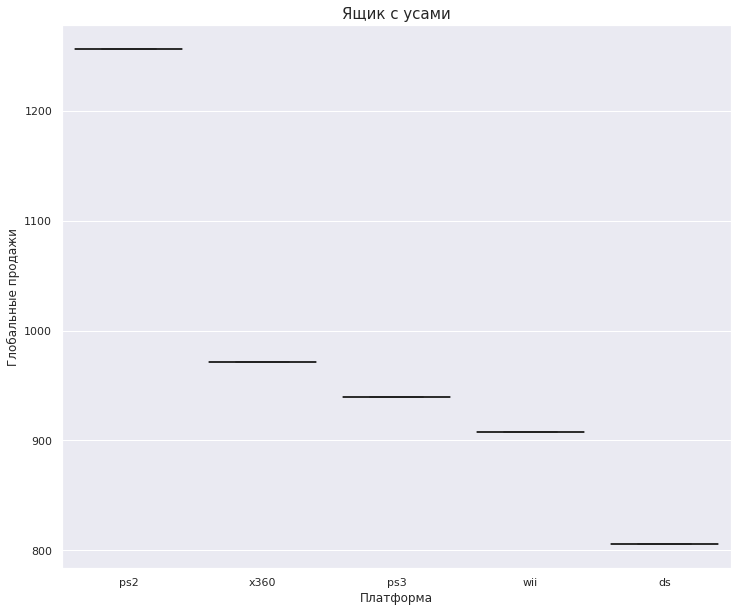

In [100]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=platforms_new, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

In [75]:
#Корреляция между оценками пользователей и продажами 
sony_play_station2 = data[data['platform']=='ps2']
sony_play_station2['user_score'].corr(sony_play_station2['total_sales'])

0.17286551112058213

Text(0.5, 1.0, 'test')

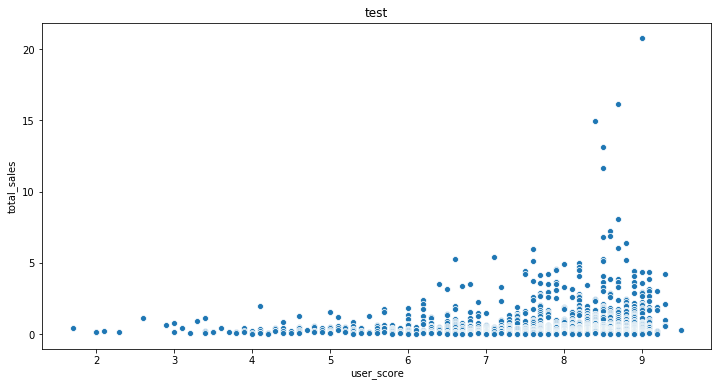

In [76]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station2)
plt.title('test')

Text(0.5, 1.0, 'test')

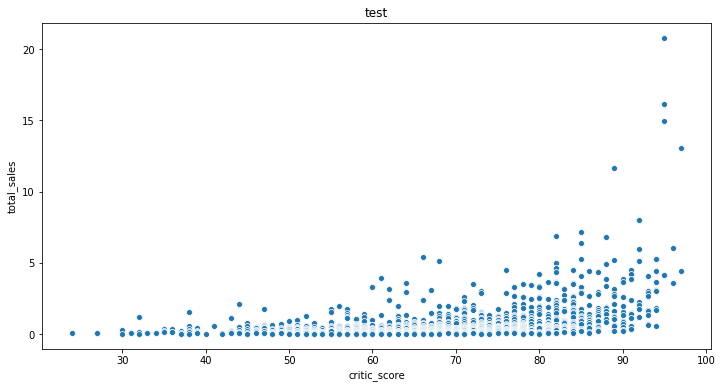

In [77]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station2)
plt.title('test')

In [78]:
#Корреляция между оценкой критиков и продажам
sony_play_station2['critic_score'].corr(sony_play_station2['total_sales'])

0.39543454945454876

Соотнесем выводы с продажами игр на других платформах.

In [79]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

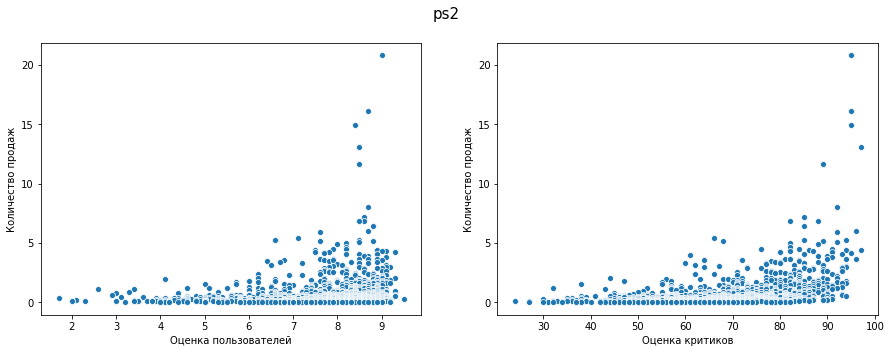

Корреляция между отзывами критиков и игровой платформой  PS2 : Умеренная 0.39543454945454876
Корреляция между отзывами пользователей и продажами  PS2 : Слабая 0.17286551112058213




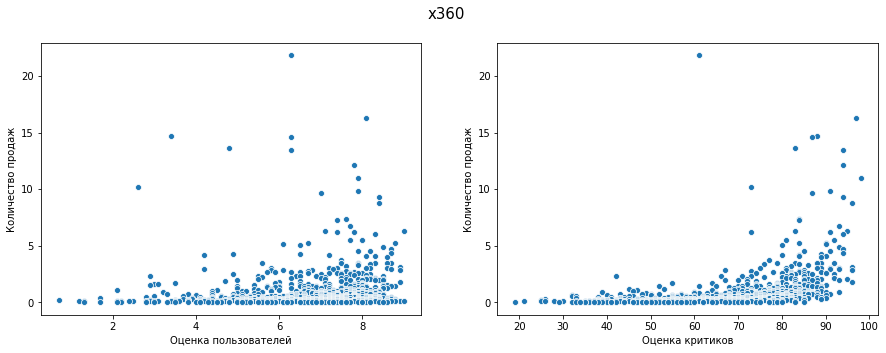

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.3937358653072588
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11445882978454185




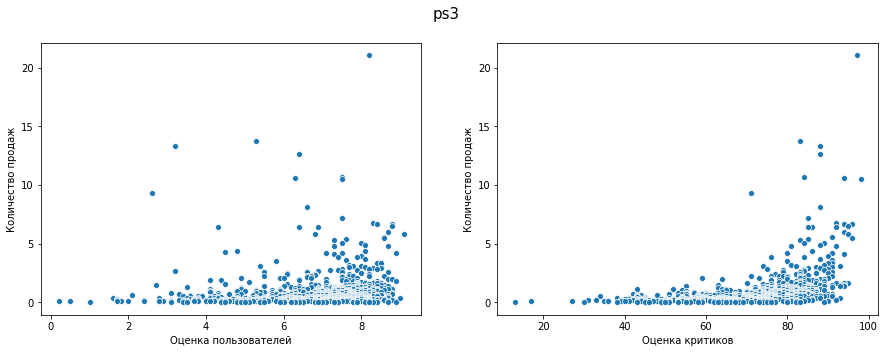

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.4324315685642061
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341712




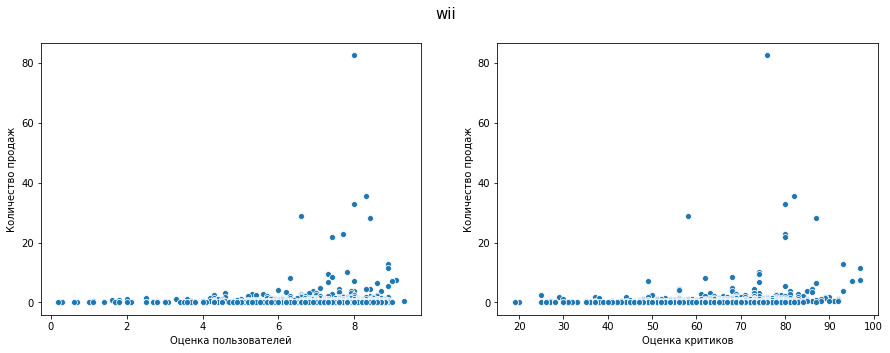

Корреляция между отзывами критиков и игровой платформой  WII : Слабая 0.17755988806089948
Корреляция между отзывами пользователей и продажами  WII : Слабая 0.11241436067003169




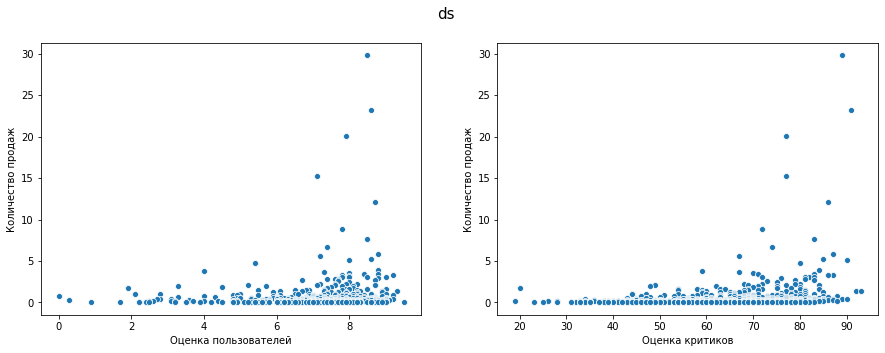

Корреляция между отзывами критиков и игровой платформой  DS : Слабая 0.23637945738859747
Корреляция между отзывами пользователей и продажами  DS : Слабая 0.1304355011164249




In [80]:
#С помощью цикла выведем все 5 графиков
for platform in top5:
    other_platform_matrix(platform)

In [81]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей
for platform in top5:
    print('Дисперсия', platform.upper(),':', np.var(data[data['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(data[data['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  data[data['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  data[data['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS2 : 1.7128899713716355
Стандартное отклонение PS2 : 1.3087742247506386
Среднее PS2 : 7.626833199033038
Медиана PS2 : 8.0


Дисперсия X360 : 2.0752880868793646
Стандартное отклонение X360 : 1.4405860220338682
Среднее X360 : 6.683540372670807
Медиана X360 : 7.0


Дисперсия PS3 : 2.1327377071986624
Стандартное отклонение PS3 : 1.460389573777717
Среднее PS3 : 6.726567844925884
Медиана PS3 : 7.1


Дисперсия WII : 3.019767825255102
Стандартное отклонение WII : 1.7377479176379702
Среднее WII : 6.742678571428572
Медиана WII : 7.15


Дисперсия DS : 2.27045054383751
Стандартное отклонение DS : 1.5068014281375997
Среднее DS : 7.025193798449613
Медиана DS : 7.4




In [82]:
#Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков
for platform in top5:
    print('Дисперсия', platform.upper(),':', np.var(data[data['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(data[data['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  data[data['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  data[data['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS2 : 170.82854741560442
Стандартное отклонение PS2 : 13.070139533134466
Среднее PS2 : 68.72727272727273
Медиана PS2 : 70.0


Дисперсия X360 : 225.25163874640072
Стандартное отклонение X360 : 15.008385614262473
Среднее X360 : 68.61681222707423
Медиана X360 : 71.0


Дисперсия PS3 : 196.96800118976796
Стандартное отклонение PS3 : 14.034528890909305
Среднее PS3 : 70.3829268292683
Медиана PS3 : 73.0


Дисперсия WII : 220.95190590985464
Стандартное отклонение WII : 14.86445108000476
Среднее WII : 62.82393162393162
Медиана WII : 65.0


Дисперсия DS : 184.03656565302896
Стандартное отклонение DS : 13.566007727147621
Среднее DS : 63.76150627615063
Медиана DS : 66.0




Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются 
больше к критикам чем к оценкам других пользователей

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?
Выделяются ли жанры с высокими и низкими продажами?

In [83]:
# Методом сводных таблиц выведем жанры и их продажи.  отсортируем по убыванию. 
distr_genre = data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Text(0, 0.5, 'Продажи')

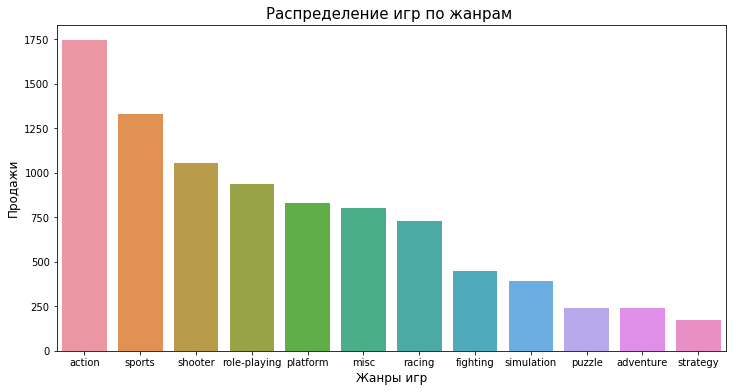

In [84]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Лучше всего продаются жанры Экшн. Стратегии как ни странно держутся на последнем месте

Вывод по исследовательскому анализу данных:

Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего продаются игры на Sony Playstation и Xbox 360
Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.
У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [85]:
#Напишем функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_2016(row, title):
    temp = data[data['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

Портрет пользователя NA

  platform  na_sales
0     x360    602.47
1      ps2    583.84
2      wii    496.90
3      ps3    393.49
4       ds    382.40



      genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27



  rating  na_sales
0      e   1292.99
1      t    759.75
2      m    748.48
3   e10+    353.32
4    k-a      2.56





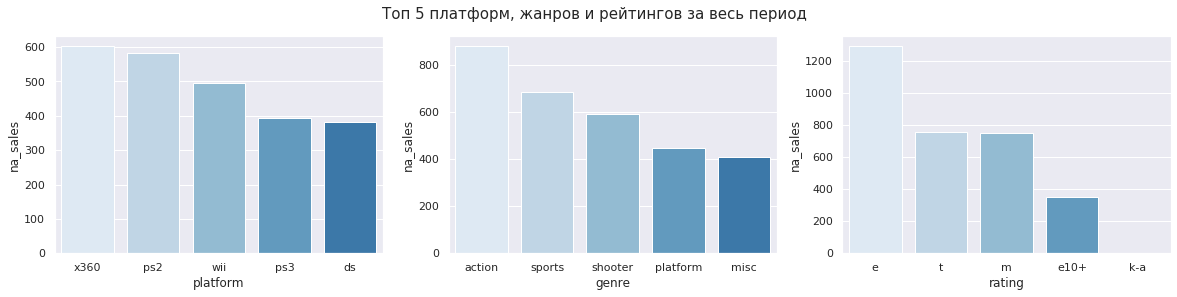

In [86]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



  rating  na_sales
0      m     15.67
1      t      8.95
2      e      7.97
3   e10+      3.81





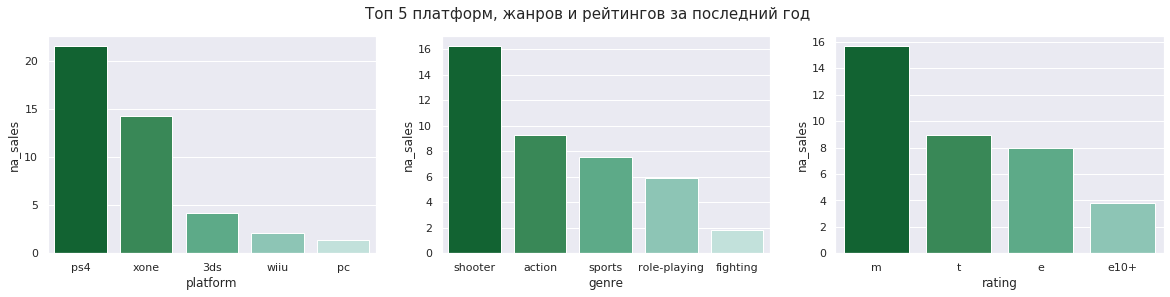

In [87]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

Вывод:
    Самые популярные игровые платформы в северной америке за все время это: XBOX, PS2, WII, PS3, DS
Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
Топ игровых приставок выглядит таким образом : PS4, Xone, DS3
Топ жанров игр: Shooter, Action, Sports
Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

Портрет пользователя EU

  platform  eu_sales
0      ps2    339.29
1      ps3    330.29
2     x360    270.76
3      wii    262.21
4       ps    213.61



     genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74



  rating  eu_sales
0      e    710.25
1      m    483.97
2      t    427.03
3   e10+    188.52
4     ao      0.61





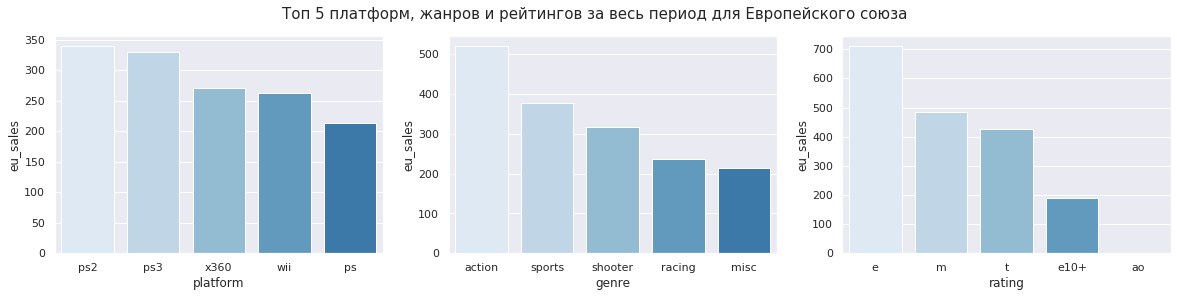

In [88]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



  rating  eu_sales
0      m     16.54
1      e     13.61
2      t      9.79
3   e10+      3.81





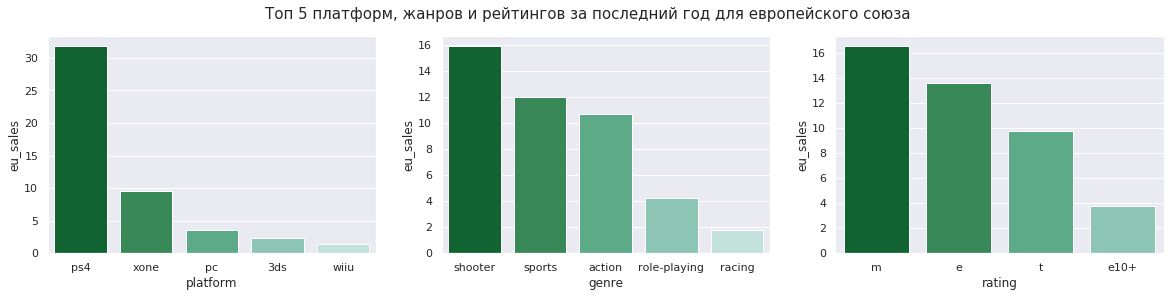

In [89]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для европейского союза
for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

Вывод: Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS
Топ 5 жанров в Европе : action, sports, shooter, racing, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

За последний год интерес у пользователя кардинально изменился:
Топ жанров стал: shooter, sports, action
Топ платформ: PS4, Xone, PC
Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

Портрет пользователя JP

  platform  jp_sales
0       ds    175.57
1       ps    139.82
2      ps2    139.20
3     snes    116.55
4      3ds    100.67



          genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11



  rating  jp_sales
0      e    198.11
1      t    151.40
2      m     64.24
3   e10+     40.20
4    k-a      1.46





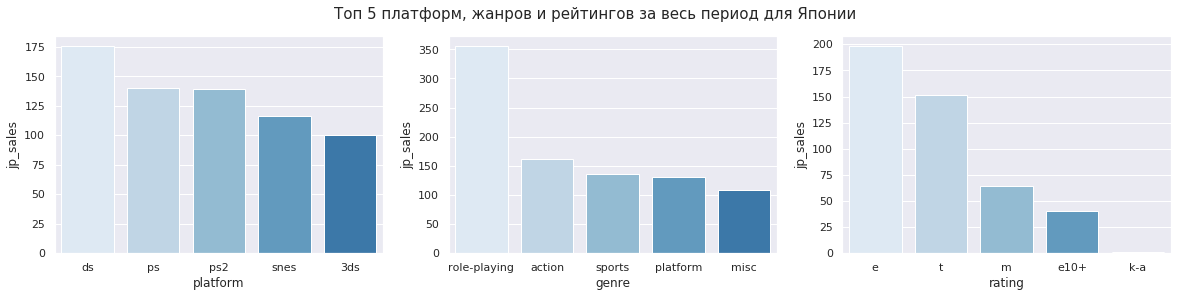

In [90]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



  rating  jp_sales
0      t      2.27
1      m      1.20
2      e      1.07
3   e10+      0.45





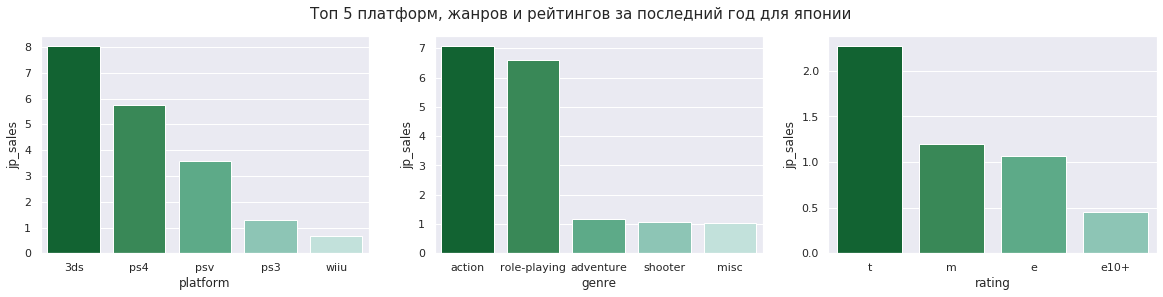

In [91]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год для японии
for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

Вывод: Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

За последний год интерес у пользователя кардинально изменился
Топ Жанров: action, role-playing, adventure
топ платформ: 3ds, ps4, psv
топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

## Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [92]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = data[(data['platform']=='xone') & (data['year_of_release']>2006)]['user_score']
pc_hyp = data[(data['platform']=='pc') & (data['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.521428571428572

In [93]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.773024054982817

In [94]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.037253715630861925
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 4% можно получить различность рейтингов двух платформ

Средние пользовательские рейтинги жанров Action 

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [95]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = data[(data['genre']=='action') & (data['year_of_release']>2006)]['user_score']
genre_sports_hyp = data[(data['genre']=='sports') & (data['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.839204545454545

In [96]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

6.3086294416243645

In [97]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.064098789244688e-11
Отвергаем нулевую гипотезу


Вывод: Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам

## Общий вывод


Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы.
Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа
Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли
Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус
Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии

После мы составили портреты пользователей каждого региона.
Выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.